<a href="https://colab.research.google.com/github/barbosa-loha/Estatistica/blob/main/An%C3%A1lise_Componentes_Principais_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pacotes e bibliotecas usados

In [ ]:
install.packages("FactoMineR")

In [ ]:
install.packages("factoextra")

In [ ]:
library(factoextra)

In [5]:
library(FactoMineR)

In [6]:
library(ggplot2)

In [ ]:
library(car)

## Banco de dados Decathlon

In [8]:
data(decathlon)

In [9]:
dados <- data.frame(decathlon[,1:10])

Abaixo, a descritiva do resumo das pontuações dos atletas em cada modalidade. Pode-se, inclusive, perceber que cada modalidade possui uma amplitude específica, o que poderia dificultar algumas análises caso não houver padronização em uma normal (média zero e variância 1).

In [10]:
summary(dados)

     X100m         Long.jump       Shot.put       High.jump         X400m      
 Min.   :10.44   Min.   :6.61   Min.   :12.68   Min.   :1.850   Min.   :46.81  
 1st Qu.:10.85   1st Qu.:7.03   1st Qu.:13.88   1st Qu.:1.920   1st Qu.:48.93  
 Median :10.98   Median :7.30   Median :14.57   Median :1.950   Median :49.40  
 Mean   :11.00   Mean   :7.26   Mean   :14.48   Mean   :1.977   Mean   :49.62  
 3rd Qu.:11.14   3rd Qu.:7.48   3rd Qu.:14.97   3rd Qu.:2.040   3rd Qu.:50.30  
 Max.   :11.64   Max.   :7.96   Max.   :16.36   Max.   :2.150   Max.   :53.20  
  X110m.hurdle       Discus        Pole.vault       Javeline    
 Min.   :13.97   Min.   :37.92   Min.   :4.200   Min.   :50.31  
 1st Qu.:14.21   1st Qu.:41.90   1st Qu.:4.500   1st Qu.:55.27  
 Median :14.48   Median :44.41   Median :4.800   Median :58.36  
 Mean   :14.61   Mean   :44.33   Mean   :4.762   Mean   :58.32  
 3rd Qu.:14.98   3rd Qu.:46.07   3rd Qu.:4.920   3rd Qu.:60.89  
 Max.   :15.67   Max.   :51.65   Max.   :5.400   M

## Distribuição das modalidades

A distribuição dos dados das modalidades estão abaixo. Isso significa que quanto mais próximo do centro da curva estão as notas que mais aparecem naquela modalidade, ou seja, a possível nota esperada alcançada pela maioria dos atletas.

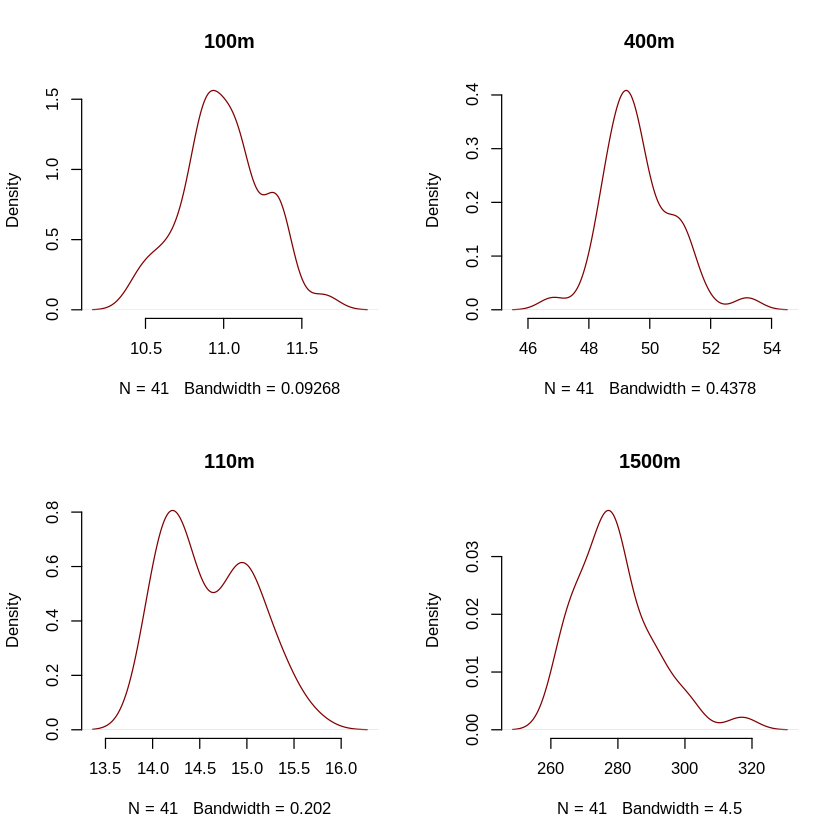

In [11]:
par(mfrow = c(2, 2))
p1 <- plot(density(dados$X100m), frame = FALSE, col = "#800000",main = "100m")
p2 <- plot(density(dados$X400m), frame = FALSE, col = "#800000",main = "400m")
p3 <- plot(density(dados$X110m.hurdle), frame = FALSE, col = "#800000",main = "110m")
p4 <- plot(density(dados$X1500m), frame = FALSE, col = "#800000",main = "1500m")

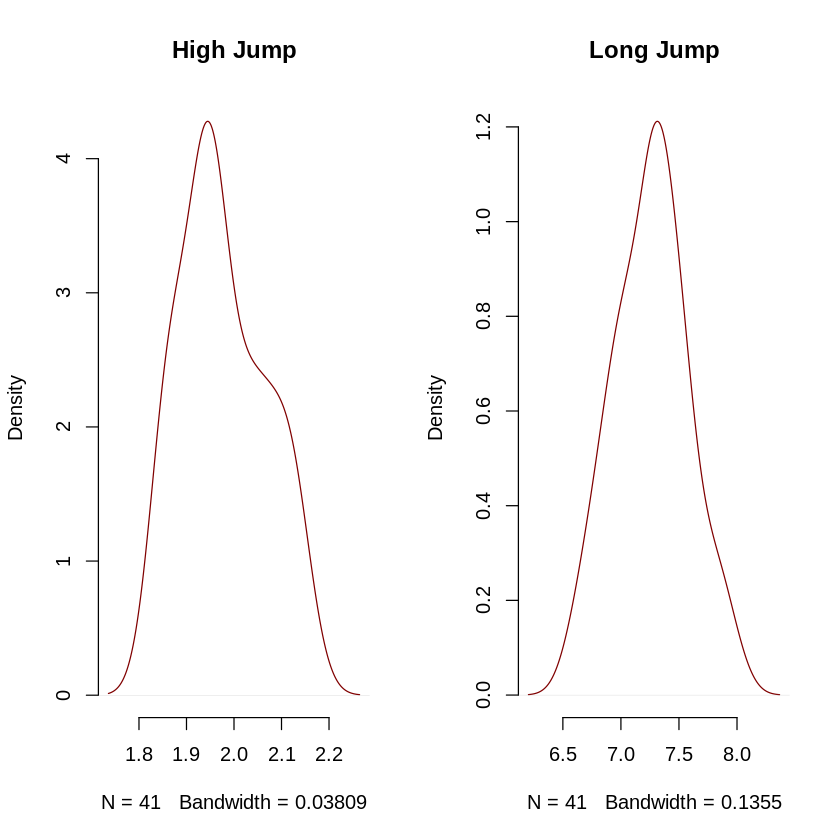

In [12]:
par(mfrow = c(1, 2))
p5 <- plot(density(dados$High.jump), frame = FALSE, col = "#800000",main = "High Jump")
p6 <- plot(density(dados$Long.jump), frame = FALSE, col = "#800000",main = "Long Jump")

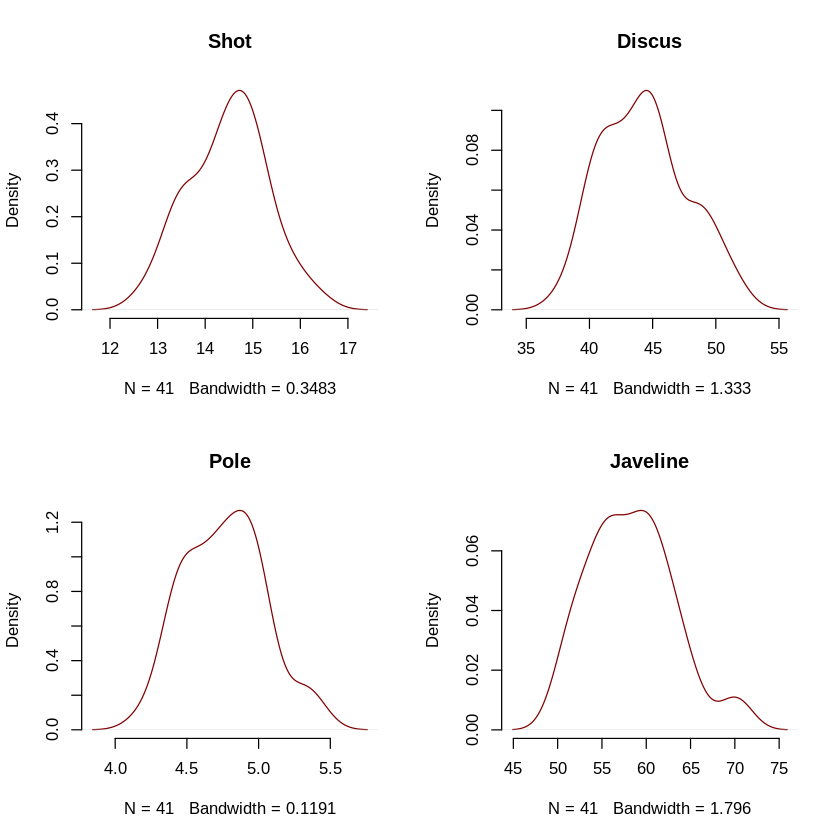

In [13]:
par(mfrow = c(2, 2))
p7 <- plot(density(dados$Shot.put), frame = FALSE, col = "#800000",main = "Shot")
p8 <- plot(density(dados$Discus), frame = FALSE, col = "#800000",main = "Discus")
p9 <- plot(density(dados$Pole.vault), frame = FALSE, col = "#800000",main = "Pole")
p10 <- plot(density(dados$Javeline), frame = FALSE, col = "#800000",main = "Javeline")

# Análise de Componentes Principais com a padronização

### Sobre o algorítimo:

- Para saber a Análise de Componentes Principais pode-se usar o comando que ja centraliza os dados em torno da média 0 e variância 1. Isso se deve porque nem todas as variáveis são medidas na mesma escala, ou seja, escalas de medições diferentes ou densidades numéricas muito discrepantes.



In [ ]:
analy_pca_cp <- prcomp(dados, scale = TRUE)

In [17]:
summary(analy_pca_cp)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.8088 1.3180 1.1853 1.0280 0.82751 0.77412 0.67174
Proportion of Variance 0.3272 0.1737 0.1405 0.1057 0.06848 0.05993 0.04512
Cumulative Proportion  0.3272 0.5009 0.6414 0.7471 0.81556 0.87548 0.92061
                           PC8     PC9    PC10
Standard deviation     0.62998 0.46348 0.42688
Proportion of Variance 0.03969 0.02148 0.01822
Cumulative Proportion  0.96030 0.98178 1.00000

***Standard deviation***: Isto nos dá o desvio padrão de cada componente e a proporção da variância explicada por cada componente. O desvio padrão dos componentes é armazenado em um elemento nomeado denominado “sdev” da variável de saída feita por ***prcomp***.

A variância total explicada pelos componentes é a soma das variâncias dos componentes:

In [35]:
analy_pca_cp$sdev

[1] 1.8088409 1.3180027 1.1852918 1.0280323 0.8275104 0.7741245 0.6717405
 [8] 0.6299814 0.4634812 0.4268811

In [37]:
sum((analy_pca_cp$sdev)^2)

[1] 10

Neste caso, vemos que a variância total é 10, que é igual ao número de variáveis ​​padronizadas. Isso ocorre porque, para dados padronizados, a variância de cada variável padronizada é 1. A variância total é a soma das variâncias de cada variável.



- Abaixo, os **autovalores** são extraídos pela função get_eigenvalue(). Os autovalores medem a quantidade de variação mantida por cada componente principal (PC). Eles são avaliados para determinar o número de componentes principais a serem considerados.

In [20]:
get_eigenvalue(analy_pca_cp)

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,3.2719055,32.719055,32.71906
Dim.2,1.7371310,17.371310,50.09037
Dim.3,1.4049167,14.049167,64.13953
Dim.4,1.0568504,10.568504,74.70804
Dim.5,0.6847735,6.847735,81.55577
Dim.6,0.5992687,5.992687,87.54846
Dim.7,0.4512353,4.512353,92.06081
Dim.8,0.3968766,3.968766,96.02958
Dim.9,0.2148149,2.148149,98.17773


Com os resultados da ultima coluna pode-se interpretar o gráfico de Scree:

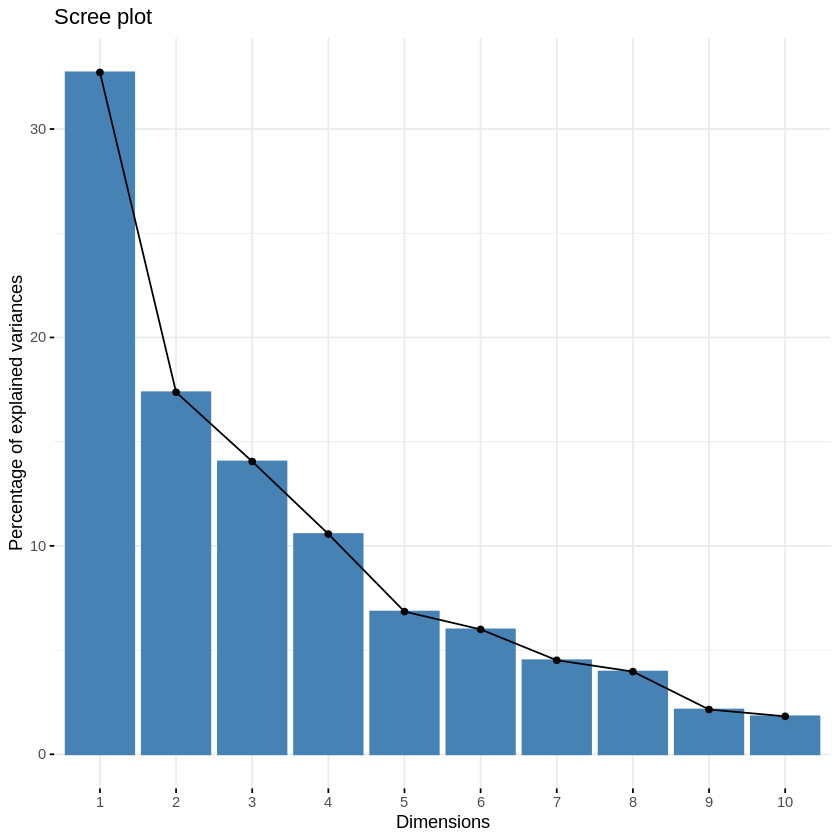

In [32]:
fviz_eig(analy_pca_cp, col.var="Blue")

É visível que os cinco primeiros componentes principais apresentam os maiores valores de proporção de variância, 81.5%. Os cinco subsequentes só conseguem explicar 18,4% dessa variância, o que pode significar que os primeiros cinco componentes principais correspondem a variação máxima no conjunto de dados.

# Outros resultados

- Cos2: Um resultado importante aqui é o de Cos2 (coordenadas quadradas) e diz sobre a qualidade de representação das variáveis.

In [23]:
results <- get_pca_var(analy_pca_cp)

In [24]:
results

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [28]:
library("factoextra")

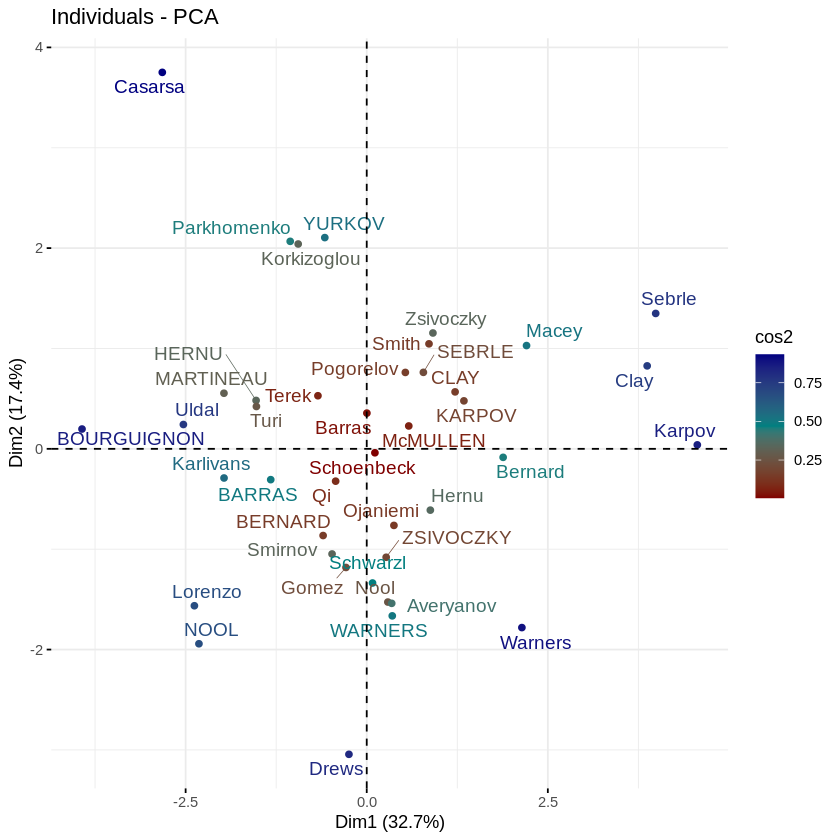

In [30]:
fviz_pca_ind(analy_pca_cp,
             col.ind = "cos2",
             gradient.cols = c("#800000", "#008080", "#000080"),
             repel = TRUE
             )

- BOURGUIGNON, Casarsa, Drews, Karpov, Clay e Sebrle possuem altas coordenadas quadradas, o que implica uma boa representação dos indivíduos na componente principal. Já Schoenbeck, Barras, Barras, Qi e McMULLEN não, o que indica que não são bem representados pelos componentes principais

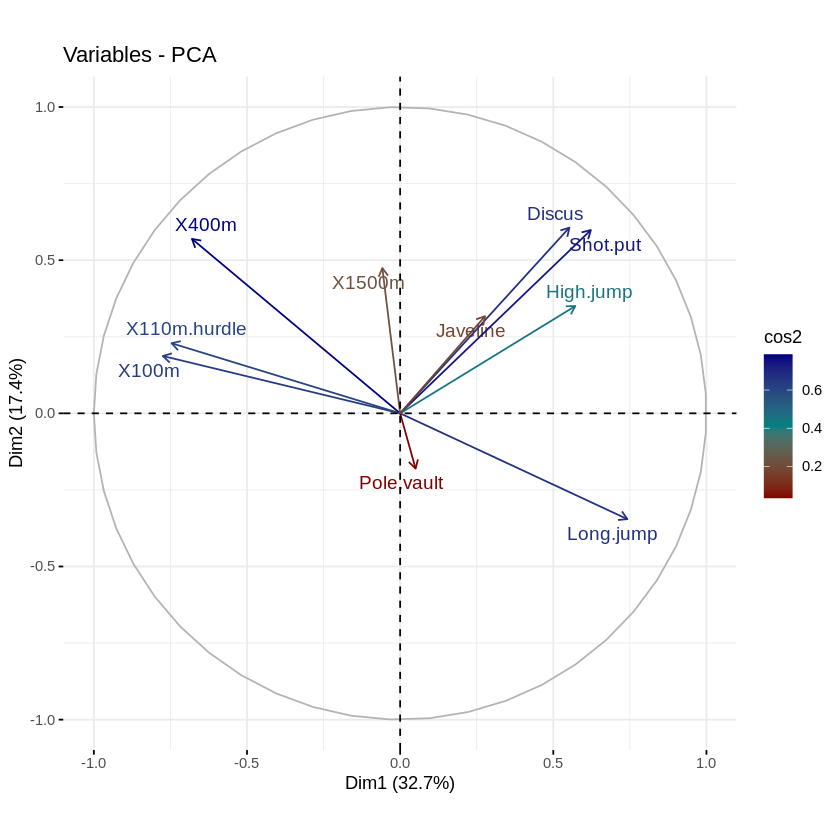

In [21]:
fviz_pca_var(analy_pca_cp,
             col.var = "cos2",
             gradient.cols = c("#800000", "#008080", "#000080"),
             repel = TRUE
             )

- X400m, Shot.put e Long.Jump possuem coordenadas quadradas elevadas em relação aos outros. Isso diz que implica uma boa representação da variável na componente principal. Neste caso as variáveis ​​são posicionadas próximas à circunferência unitária do círculo de correlação. Da mesma maneira, Javeline, Pole.Vault e X1500m possuem as menores coordenadas quadradas, o que indica que a variável não é perfeitamente representada pelos componente principais.

# Ranking para os atletas

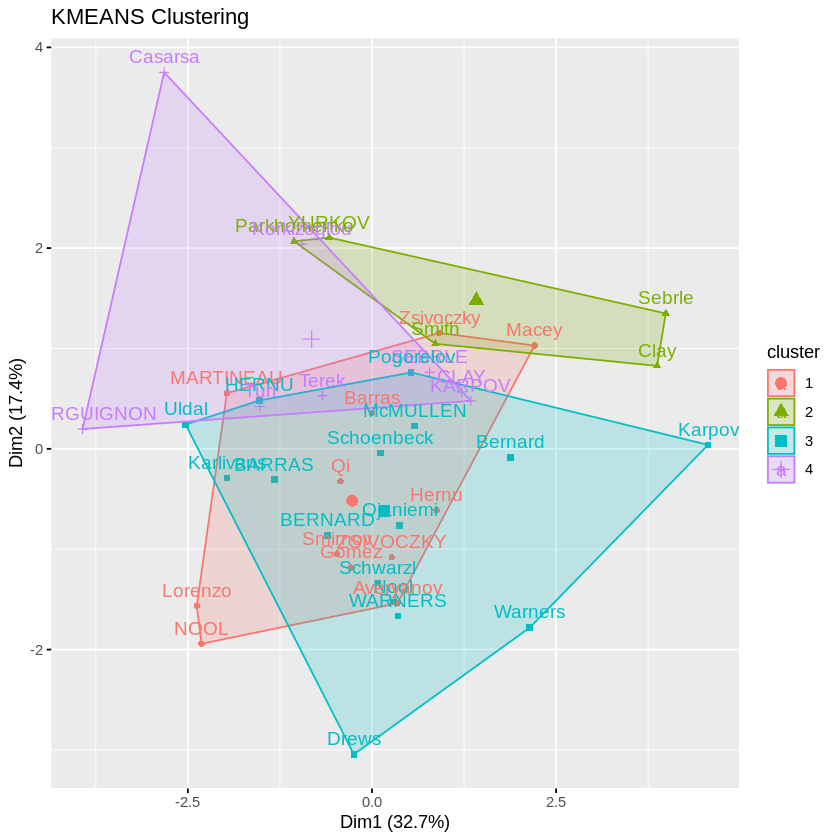

In [34]:
kmeans<-eclust(dados, k=4)

O cluster azul, mais próximo da origem em Dim1, são os atletas com melhores desempenhos nas competições. O vermelho são os atletas com desmepenho mediano. Seguindo para o cluster verde, atletas com desmepenho mediano para ruim. Por fim, o cluster roxo os atletas com desempenho ruim.